In [9]:
import numpy as np

In [10]:
import pandas as pnd

In [11]:
client = pnd.read_csv('client_accounts.csv')

In [12]:
client

,account_id,client_id
0,1,1
1,2,2
2,3,2
3,4,3
4,5,3
...,...,...
5364,13955,11349
5365,13956,11349
5366,13968,11359
5367,13971,11362


In [13]:
trans = pnd.read_csv('trans.csv')

C:\Users\Zbook G3\Pyhton\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,2017-09-10 03:24:33,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN
1,171812,576,2017-09-14 03:24:33,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN
2,207264,704,2017-09-21 03:24:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,2017-09-06 03:24:33,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN
4,579373,1972,2017-09-19 03:41:13,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2019-04-25 21:11:13,INCOME,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,2019-04-27 21:11:13,INCOME,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,2019-05-09 21:11:13,INCOME,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,2019-04-24 21:11:13,INCOME,NaN,107.5,23453.0,UROK,NaN,NaN


In [15]:
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [16]:
trans[5:10:2]

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
5,771035,2632,2017-09-12 03:41:13,INCOME,DEPOSIT,1100.0,1100.0,NaN,NaN,NaN
7,725751,2484,2017-09-07 03:57:53,INCOME,DEPOSIT,1100.0,1100.0,NaN,NaN,NaN
9,232960,793,2017-09-08 03:57:53,INCOME,DEPOSIT,800.0,800.0,NaN,NaN,NaN


In [17]:
trans.describe()

,trans_id,account_id,amount,balance,account
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,2.953890e+05
mean,1.335311e+06,2.936867e+03,5.924146e+03,3.851833e+04,4.567092e+07
std,1.227487e+06,2.477345e+03,9.522735e+03,2.211787e+04,3.066340e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.112570e+04,0.000000e+00
25%,4.302628e+05,1.204000e+03,1.359000e+02,2.240250e+04,1.782858e+07
50%,8.585065e+05,2.434000e+03,2.100000e+03,3.314340e+04,4.575095e+07
75%,2.060979e+06,3.660000e+03,6.800000e+03,4.960362e+04,7.201341e+07
max,3.682987e+06,1.138200e+04,8.740000e+04,2.096370e+05,9.999420e+07


In [18]:
trans.dtypes

trans_id        int64
account_id      int64
date           object
type           object
operation      object
amount        float64
balance       float64
k_symbol       object
bank           object
account       float64
dtype: object

In [19]:
pnd.set_option('display.max_rows', 200)

In [20]:
pnd.set_option('display.max_columns', 20)

In [21]:
trans.info

<bound method DataFrame.info of          trans_id  account_id                 date    type operation  amount  \
0          695247        2378  2017-09-10 03:24:33  INCOME   DEPOSIT   700.0   
1          171812         576  2017-09-14 03:24:33  INCOME   DEPOSIT   900.0   
2          207264         704  2017-09-21 03:24:33  INCOME   DEPOSIT  1000.0   
3         1117247        3818  2017-09-06 03:24:33  INCOME   DEPOSIT   600.0   
4          579373        1972  2017-09-19 03:41:13  INCOME   DEPOSIT   400.0   
...           ...         ...                  ...     ...       ...     ...   
1056315   3626622        2906  2019-04-25 21:11:13  INCOME       NaN    62.3   
1056316   3627616        2935  2019-04-27 21:11:13  INCOME       NaN    81.3   
1056317   3625403        2869  2019-05-09 21:11:13  INCOME       NaN    60.2   
1056318   3626683        2907  2019-04-24 21:11:13  INCOME       NaN   107.5   
1056319   3626540        2902  2019-05-03 21:11:13  INCOME       NaN   164.1   

       

In [22]:
np.unique(trans['type'])

array(['CHOICE', 'EXPENDITURE', 'INCOME'], dtype=object)

In [23]:
sum(trans['bank'].isna())

782812

In [24]:
trans.size

10563200

In [25]:
data = client.merge(trans, left_on='account_id', right_on='account_id', how='inner', indicator=True)


In [26]:
data.shape

(877282, 12)

In [27]:
data.isna().sum()/data.shape[0]

account_id    0.000000
client_id     0.000000
trans_id      0.000000
date          0.000000
type          0.000000
operation     0.171244
amount        0.000000
balance       0.000000
k_symbol      0.450974
bank          0.734581
account       0.719337
_merge        0.000000
dtype: float64

In [28]:
data.drop(['bank', 'account', 'k_symbol'], axis = 1, inplace=True)

In [29]:
data.isna().sum() / data.shape[0]

account_id    0.000000
client_id     0.000000
trans_id      0.000000
date          0.000000
type          0.000000
operation     0.171244
amount        0.000000
balance       0.000000
_merge        0.000000
dtype: float64

In [30]:
data.describe()

,account_id,client_id,trans_id,amount,balance
count,877282.000000,877282.000000,8.772820e+05,877282.000000,877282.000000
mean,2190.529907,1811.697486,1.147506e+06,5577.168789,37550.563566
std,1417.140768,1168.597852,1.170650e+06,9072.881116,21282.748945
min,1.000000,1.000000,1.000000e+00,0.000000,-41125.700000
25%,1051.000000,873.000000,3.738422e+05,131.500000,22034.825000
50%,2122.000000,1750.000000,7.510375e+05,2000.000000,32248.500000
75%,3195.000000,2649.000000,1.132940e+06,6355.000000,48087.375000
max,11362.000000,9227.000000,3.682134e+06,87400.000000,194119.300000


In [31]:
data.select_dtypes(include=['object']).describe()

,date,type,operation
count,877282,877282,727053
unique,41250,3,5
top,2019-04-15 11:11:13,EXPENDITURE,CHOICE
freq,440,530670,358085


In [32]:
data['type'].unique()


array(['INCOME', 'EXPENDITURE', 'CHOICE'], dtype=object)

In [33]:
data['operation'].unique()

array(['DEPOSIT', 'TRANSFER FROM ACCOUNT', nan, 'CHOICE',
       'ACCOUNT TRANSFER', 'CARD'], dtype=object)

In [34]:
gr = data.groupby(['type', 'operation'])['trans_id'].agg('count')
gr

type         operation            
CHOICE       CHOICE                    10947
EXPENDITURE  ACCOUNT TRANSFER         176395
             CARD                       7137
             CHOICE                   347138
INCOME       DEPOSIT                  128983
             TRANSFER FROM ACCOUNT     56453
Name: trans_id, dtype: int64

In [35]:
data

,account_id,client_id,trans_id,date,type,operation,amount,balance,_merge
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,both
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,both
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,both
3,1,1,3530438,2018-05-14 09:21:13,INCOME,NaN,19.2,17298.2,both
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,both
...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,both
877278,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,both
877279,11362,9227,3424236,2019-04-29 15:54:33,EXPENDITURE,ACCOUNT TRANSFER,5392.0,41247.8,both
877280,11362,9227,3424248,2019-04-30 17:51:13,EXPENDITURE,CHOICE,2880.0,38367.8,both


In [36]:
data[data['type'] =='INCOME']['operation'].isna().sum()

150229

In [37]:
data[data['type'] =='INCOME']['operation'].shape

(335665,)

In [38]:
filled = data['operation'].fillna('DEPOSIT')

In [39]:
data['operation'] = filled

In [40]:
data.isna().sum()

account_id    0
client_id     0
trans_id      0
date          0
type          0
operation     0
amount        0
balance       0
_merge        0
dtype: int64

In [41]:
no_of_accounts = client.groupby(['client_id'])['account_id'].agg(['count'])


In [42]:
no_of_accounts

,count
client_id,
1,1
2,2
3,2
4,1
5,1
...,...
11333,1
11349,2
11359,1


In [43]:
data.drop(['_merge'], axis = 1, inplace=True)

In [44]:
new = data.merge(no_of_accounts, left_on='client_id', right_on='client_id', how='inner', indicator=True)


In [45]:
new[new['client_id'] == 2]

,account_id,client_id,trans_id,date,type,operation,amount,balance,count,_merge
239,2,2,276,2017-09-09 14:07:53,INCOME,DEPOSIT,1100.0,1100.0,2,both
240,2,2,279,2017-09-24 14:01:13,INCOME,TRANSFER FROM ACCOUNT,20236.0,21336.0,2,both
241,2,2,697,2017-09-12 18:27:53,INCOME,DEPOSIT,3700.0,25036.0,2,both
242,2,2,3530483,2017-09-10 19:17:53,INCOME,DEPOSIT,13.5,25049.5,2,both
243,2,2,280,2017-09-27 17:47:53,INCOME,TRANSFER FROM ACCOUNT,20236.0,45285.5,2,both
...,...,...,...,...,...,...,...,...,...,...
829,3,2,909,2019-05-06 14:31:13,EXPENDITURE,ACCOUNT TRANSFER,327.0,45732.5,2,both
830,3,2,933,2019-04-30 15:04:33,EXPENDITURE,ACCOUNT TRANSFER,3539.0,42193.5,2,both
831,3,2,861,2019-04-23 15:37:53,INCOME,DEPOSIT,11253.0,53446.5,2,both
832,3,2,939,2019-05-03 19:14:33,EXPENDITURE,CHOICE,2560.0,50886.5,2,both


In [46]:
data['no_of_acc'] = new['count']

In [47]:
data

,account_id,client_id,trans_id,date,type,operation,amount,balance,no_of_acc
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,1
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,1
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,1
3,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.2,17298.2,1
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,1
...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,1
877278,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,1
877279,11362,9227,3424236,2019-04-29 15:54:33,EXPENDITURE,ACCOUNT TRANSFER,5392.0,41247.8,1
877280,11362,9227,3424248,2019-04-30 17:51:13,EXPENDITURE,CHOICE,2880.0,38367.8,1


In [48]:
pt_type = data.pivot_table(values=['amount'], index=['client_id', 'type'], aggfunc='sum')
pt_type

amount
client_id type                  
1         EXPENDITURE   180854.0
          INCOME        194320.5
2         CHOICE        217442.0
          EXPENDITURE  1458946.6
          INCOME       1770112.5
...                          ...
9225      CHOICE         29529.0
          EXPENDITURE  1406911.2
          INCOME       1511641.2
9227      EXPENDITURE   645739.8
          INCOME        684270.7

[7234 rows x 1 columns]

In [49]:
new2 = data.merge(pt_type, left_on=['client_id', 'type'], right_on=['client_id', 'type'], how='inner', indicator=True)
new2


,account_id,client_id,trans_id,date,type,operation,amount_x,balance,no_of_acc,amount_y,_merge
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,1,194320.5,both
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,1,194320.5,both
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,1,194320.5,both
3,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.2,17298.2,1,194320.5,both
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,1,194320.5,both
...,...,...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424140,2019-05-04 14:31:13,EXPENDITURE,ACCOUNT TRANSFER,330.0,51475.8,1,645739.8,both
877278,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,1,645739.8,both
877279,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,1,645739.8,both
877280,11362,9227,3424236,2019-04-29 15:54:33,EXPENDITURE,ACCOUNT TRANSFER,5392.0,41247.8,1,645739.8,both


In [50]:
data['sum-type'] = new2['amount_y']
data

,account_id,client_id,trans_id,date,type,operation,amount,balance,no_of_acc,sum-type
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,1,194320.5
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,1,194320.5
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,1,194320.5
3,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.2,17298.2,1,194320.5
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,1,194320.5
...,...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,1,645739.8
877278,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,1,645739.8
877279,11362,9227,3424236,2019-04-29 15:54:33,EXPENDITURE,ACCOUNT TRANSFER,5392.0,41247.8,1,645739.8
877280,11362,9227,3424248,2019-04-30 17:51:13,EXPENDITURE,CHOICE,2880.0,38367.8,1,645739.8


In [51]:
pt_operation = data.pivot_table(values=['amount'], index=['client_id', 'operation'], aggfunc='sum')
pt_operation

amount
client_id operation                       
1         ACCOUNT TRANSFER         98080.0
          CHOICE                   82774.0
          DEPOSIT                  28765.5
          TRANSFER FROM ACCOUNT   165555.0
2         ACCOUNT TRANSFER        618247.8
...                                    ...
9225      DEPOSIT                  12364.2
          TRANSFER FROM ACCOUNT  1499277.0
9227      ACCOUNT TRANSFER        309438.0
          CHOICE                  336301.8
          DEPOSIT                 684270.7

[11163 rows x 1 columns]

In [52]:
new3 = data.merge(pt_operation, left_on=['client_id', 'operation'], right_on=['client_id', 'operation'], how='inner', indicator=True)
new3

,account_id,client_id,trans_id,date,type,operation,amount_x,balance,no_of_acc,sum-type,amount_y,_merge
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,1,194320.5,28765.5,both
1,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,1,194320.5,28765.5,both
2,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.2,17298.2,1,194320.5,28765.5,both
3,1,1,200,2018-05-02 11:11:13,INCOME,DEPOSIT,2100.0,23077.2,1,194320.5,28765.5,both
4,1,1,3530439,2018-05-13 13:24:33,INCOME,DEPOSIT,79.0,23156.2,1,194320.5,28765.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424188,2019-05-07 14:14:33,EXPENDITURE,ACCOUNT TRANSFER,129.0,51805.8,1,645739.8,309438.0,both
877278,11362,9227,3424140,2019-05-04 14:31:13,EXPENDITURE,ACCOUNT TRANSFER,330.0,51475.8,1,645739.8,309438.0,both
877279,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,1,645739.8,309438.0,both
877280,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,1,645739.8,309438.0,both


In [53]:
data['sum-operation'] = new3['amount_y']

In [54]:
data

,account_id,client_id,trans_id,date,type,operation,amount,balance,no_of_acc,sum-type,sum-operation
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.0,1000.0,1,194320.5,28765.5
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,1,194320.5,28765.5
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.0,17279.0,1,194320.5,28765.5
3,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.2,17298.2,1,194320.5,28765.5
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,1,194320.5,28765.5
...,...,...,...,...,...,...,...,...,...,...,...
877277,11362,9227,3424092,2019-04-30 14:47:53,EXPENDITURE,ACCOUNT TRANSFER,56.0,51419.8,1,645739.8,309438.0
877278,11362,9227,3424044,2019-04-25 15:21:13,EXPENDITURE,ACCOUNT TRANSFER,4780.0,46639.8,1,645739.8,309438.0
877279,11362,9227,3424236,2019-04-29 15:54:33,EXPENDITURE,ACCOUNT TRANSFER,5392.0,41247.8,1,645739.8,309438.0
877280,11362,9227,3424248,2019-04-30 17:51:13,EXPENDITURE,CHOICE,2880.0,38367.8,1,645739.8,309438.0


# RFM

In [58]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 877282 entries, 0 to 877281
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   account_id     877282 non-null  int64  
 1   client_id      877282 non-null  int64  
 2   trans_id       877282 non-null  int64  
 3   date           877282 non-null  object 
 4   type           877282 non-null  object 
 5   operation      877282 non-null  object 
 6   amount         877282 non-null  float64
 7   balance        877282 non-null  float64
 8   no_of_acc      877282 non-null  int64  
 9   sum-type       877282 non-null  float64
 10  sum-operation  877282 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 80.3+ MB


In [60]:
data['date'] = pnd.to_datetime(data['date'])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877282 entries, 0 to 877281
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   account_id     877282 non-null  int64         
 1   client_id      877282 non-null  int64         
 2   trans_id       877282 non-null  int64         
 3   date           877282 non-null  datetime64[ns]
 4   type           877282 non-null  object        
 5   operation      877282 non-null  object        
 6   amount         877282 non-null  float64       
 7   balance        877282 non-null  float64       
 8   no_of_acc      877282 non-null  int64         
 9   sum-type       877282 non-null  float64       
 10  sum-operation  877282 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 80.3+ MB


<AxesSubplot:>

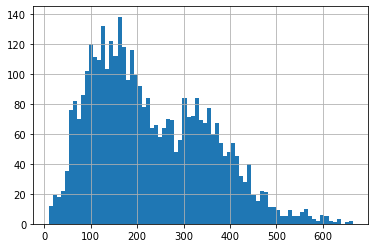

In [66]:
%matplotlib inline

trans_per_client = data.groupby('account_id')['trans_id'].count()
trans_per_client.hist(bins=75)

In [69]:
trans_per_client

account_id
1        239
2        478
3        117
4        186
5         84
        ... 
11123    146
11271    303
11327     75
11359    378
11362    344
Name: trans_id, Length: 3829, dtype: int64

In [71]:
data_customers = data.groupby('account_id').agg({'date': 'max', 'amount': ['sum', 'count'] })

In [72]:
data_customers.head()

date     amount      
                           max        sum count
account_id                                     
1          2019-05-08 13:57:53   375174.5   239
2          2019-05-09 16:44:33  3151479.3   478
3          2019-05-07 11:51:13   295021.8   117
4          2019-05-08 12:24:33   350971.4   186
5          2019-05-08 14:37:53   166881.4    84

In [73]:
data_customers.columns = ['-'.join(x) for x in data_customers.columns]

In [74]:
data_customers.head()

,date-max,amount-sum,amount-count
account_id,,,
1,2019-05-08 13:57:53,375174.5,239
2,2019-05-09 16:44:33,3151479.3,478
3,2019-05-07 11:51:13,295021.8,117
4,2019-05-08 12:24:33,350971.4,186
5,2019-05-08 14:37:53,166881.4,84


In [76]:
max_date = data_customers['date-max'].max()
max_date

Timestamp('2019-05-09 21:11:13')

In [78]:
from datetime import datetime, timedelta

max_date = datetime.strptime('2019-05-10', '%Y-%m-%d')

In [80]:
data_customers['diff_date'] = data_customers['date-max'].apply(lambda x : (max_date - x).seconds/60)

In [81]:
data_customers['diff_date'] = 1/data_customers['diff_date']

In [82]:
data_customers.head()

,date-max,amount-sum,amount-count,diff_date
account_id,,,,
1,2019-05-08 13:57:53,375174.5,239,0.001661
2,2019-05-09 16:44:33,3151479.3,478,0.002296
3,2019-05-07 11:51:13,295021.8,117,0.001372
4,2019-05-08 12:24:33,350971.4,186,0.001438
5,2019-05-08 14:37:53,166881.4,84,0.001779


In [83]:
#Ovim smo dobili Recency (invertovali smo vrednost, zato sto nama odgovara koji klijent ima manje minuta, jer je taj
#kupio skorije)
    

In [92]:
data_customers['Recency'] = pnd.qcut(data_customers['diff_date'], q=5, labels=False) + 1

In [93]:
data_customers['Recency'].unique()

array([2, 4, 1, 3, 5], dtype=int64)

In [98]:
data_customers['Monetary'] = pnd.qcut(data_customers['amount-sum'], q=5, labels=False) + 1

In [99]:
data_customers['Frequency'] = pnd.qcut(data_customers['amount-count'], q=5, labels=False) + 1

In [100]:
data_customers

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary
account_id,,,,,,,
1,2019-05-08 13:57:53,375174.5,239,0.001661,2,3,2
2,2019-05-09 16:44:33,3151479.3,478,0.002296,4,5,5
3,2019-05-07 11:51:13,295021.8,117,0.001372,1,2,1
4,2019-05-08 12:24:33,350971.4,186,0.001438,1,3,2
5,2019-05-08 14:37:53,166881.4,84,0.001779,2,1,1
...,...,...,...,...,...,...,...
11123,2019-05-08 17:07:53,1043600.7,146,0.002426,4,2,3
11271,2019-05-08 11:17:53,1045427.8,303,0.001312,1,4,3
11327,2019-05-08 15:54:33,559881.6,75,0.002060,3,1,2


In [101]:
data_customers['RFM'] = data_customers[['Recency', 'Frequency', 'Monetary']].agg('prod', axis=1)

In [102]:
data_customers.head()

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary,RFM
account_id,,,,,,,,
1,2019-05-08 13:57:53,375174.5,239,0.001661,2,3,2,12
2,2019-05-09 16:44:33,3151479.3,478,0.002296,4,5,5,100
3,2019-05-07 11:51:13,295021.8,117,0.001372,1,2,1,2
4,2019-05-08 12:24:33,350971.4,186,0.001438,1,3,2,6
5,2019-05-08 14:37:53,166881.4,84,0.001779,2,1,1,2


In [103]:
data_customers['RFM Cluster'] = pnd.cut(data_customers['RFM'], bins=[0, 1, 8, 27, 64, 125], labels=False) + 1

In [104]:
data_customers.head()

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary,RFM,RFM Cluster
account_id,,,,,,,,,
1,2019-05-08 13:57:53,375174.5,239,0.001661,2,3,2,12,3
2,2019-05-09 16:44:33,3151479.3,478,0.002296,4,5,5,100,5
3,2019-05-07 11:51:13,295021.8,117,0.001372,1,2,1,2,2
4,2019-05-08 12:24:33,350971.4,186,0.001438,1,3,2,6,2
5,2019-05-08 14:37:53,166881.4,84,0.001779,2,1,1,2,2


In [105]:
data_customers.groupby('RFM Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'max', 'min'])

Recency         Frequency          Monetary        
                 mean max min      mean max min      mean max min
RFM Cluster                                                      
1            1.000000   1   1  1.000000   1   1  1.000000   1   1
2            2.352697   5   1  1.606846   4   1  1.647303   4   1
3            2.613861   5   1  2.941419   5   1  2.985149   5   1
4            3.521697   5   2  3.779171   5   2  3.684667   5   2
5            4.332665   5   3  4.625251   5   3  4.695391   5   3

In [106]:
pnd.options.display.float_format = '{:.2f}'.format

In [108]:
data_customers['diff_date'] = (1/data_customers['diff_date'])

In [109]:
data_customers.groupby('RFM Cluster')[['amount-sum', 'amount-count', 'diff_date']].agg(['mean', 'std'])

amount-sum            amount-count       diff_date       
                  mean        std         mean   std      mean    std
RFM Cluster                                                          
1            149706.78   72682.58        66.45 30.98    939.35 181.32
2            407265.06  333520.44       119.28 57.72    618.72 228.42
3           1079549.90  923630.69       219.86 99.87    570.73 232.82
4           1618196.89 1151132.78       288.35 98.95    423.22 150.51
5           2998288.42 1369882.76       378.83 88.86    318.78 126.14

In [113]:
import matplotlib.pyplot as plt

seg_1 = list(data_customers[data_customers['RFM Cluster'] == 1]['amount-count'])
seg_2 = list(data_customers[data_customers['RFM Cluster'] == 2]['amount-count'])
seg_3 = list(data_customers[data_customers['RFM Cluster'] == 3]['amount-count'])
seg_4 = list(data_customers[data_customers['RFM Cluster'] == 4]['amount-count'])
seg_5 = list(data_customers[data_customers['RFM Cluster'] == 5]['amount-count'])




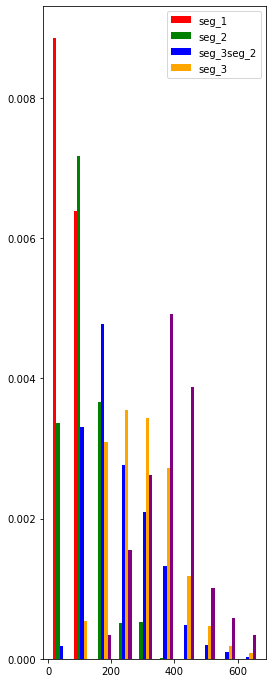

In [117]:
plt.close()
plt.hist([seg_1, seg_2, seg_3, seg_4, seg_5], density=True,  color=['red', 'green', 'blue', 'orange', 'purple'], label=['seg_1', 'seg_2', 'seg_3' 'seg_2', 'seg_3'])
plt.legend()
plt.rcParams["figure.figsize"]=(10,12)
plt.show()

In [121]:
data_customers.head()

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary,RFM,RFM Cluster
account_id,,,,,,,,,
1,2019-05-08 13:57:53,375174.50,239,602.12,2,3,2,12,3
2,2019-05-09 16:44:33,3151479.30,478,435.45,4,5,5,100,5
3,2019-05-07 11:51:13,295021.80,117,728.78,1,2,1,2,2
4,2019-05-08 12:24:33,350971.40,186,695.45,1,3,2,6,2
5,2019-05-08 14:37:53,166881.40,84,562.12,2,1,1,2,2


In [122]:
def rfm_group_mapping(R, F, M):
    if (R == 1) & (F <= 2) & (M <= 2):
        return 'Lost'
    elif (R <= 2) & (3 <= F <= 5) & (3 <= M <= 5):
        return 'Shouldn\'t lose them'
    elif (R >= 3) & (1 <= F <= 2) & (1 <= M <= 2):
        return 'Opportunity'
    elif (4 <= R <= 5) & (3 <= F <= 5) & (3 <= M <= 5):
        return 'Standard'
    elif (4 <= R <= 5) & (F <= 2) & (M <= 2):
        return 'New potential'
    elif (4 <= R <= 5) & (4 <= F <= 5) & (4 <= M <= 5):
        return 'MVP\'s'
    else: 
        return 'Other'

In [123]:
data_customers['RFM Group'] = data_customers.apply(lambda x: rfm_group_mapping(x['Recency'], x['Frequency'], x['Monetary']), axis=1)

In [127]:
data_customers['RFM Group'].value_counts()

Other                  1649
Standard                700
Shouldn't lose them     696
Opportunity             549
Lost                    235
Name: RFM Group, dtype: int64

# Hiearchial clustering

In [131]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [143]:
data.info()
cluster_subset = data[['account_id','no_of_acc', 'sum-type', 'sum-operation']]
cluster_subset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877282 entries, 0 to 877281
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   account_id     877282 non-null  int64         
 1   client_id      877282 non-null  int64         
 2   trans_id       877282 non-null  int64         
 3   date           877282 non-null  datetime64[ns]
 4   type           877282 non-null  object        
 5   operation      877282 non-null  object        
 6   amount         877282 non-null  float64       
 7   balance        877282 non-null  float64       
 8   no_of_acc      877282 non-null  int64         
 9   sum-type       877282 non-null  float64       
 10  sum-operation  877282 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 80.3+ MB


,account_id,no_of_acc,sum-type,sum-operation
0,1,1,194320.50,28765.50
1,1,1,194320.50,28765.50
2,1,1,194320.50,28765.50
3,1,1,194320.50,28765.50
4,1,1,194320.50,28765.50
...,...,...,...,...
877277,11362,1,645739.80,309438.00
877278,11362,1,645739.80,309438.00
877279,11362,1,645739.80,309438.00
877280,11362,1,645739.80,309438.00


In [147]:
cluster_subset.groupby('account_id')['sum-type', 'sum-operation'].agg('count')

C:\Users\ZBOOKG~1\AppData\Local\Temp/ipykernel_16016/349487218.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_subset.groupby('account_id')['sum-type', 'sum-operation'].agg('count')


,sum-type,sum-operation
account_id,,
1,239,239
2,478,478
3,117,117
4,186,186
5,84,84
...,...,...
11123,146,146
11271,303,303
11327,75,75


In [150]:
cluster_subset.head(150)

,account_id,no_of_acc,sum-type,sum-operation
0,1,1,194320.50,28765.50
1,1,1,194320.50,28765.50
2,1,1,194320.50,28765.50
3,1,1,194320.50,28765.50
4,1,1,194320.50,28765.50
5,1,1,194320.50,28765.50
6,1,1,194320.50,28765.50
7,1,1,194320.50,28765.50
8,1,1,194320.50,28765.50
9,1,1,194320.50,28765.50


In [151]:
data.head(150)

,account_id,client_id,trans_id,date,type,operation,amount,balance,no_of_acc,sum-type,sum-operation
0,1,1,1,2018-05-12 03:54:33,INCOME,DEPOSIT,1000.00,1000.00,1,194320.50,28765.50
1,1,1,5,2018-05-02 04:37:53,INCOME,TRANSFER FROM ACCOUNT,3679.00,4679.00,1,194320.50,28765.50
2,1,1,199,2018-05-01 07:24:33,INCOME,DEPOSIT,12600.00,17279.00,1,194320.50,28765.50
3,1,1,3530438,2018-05-14 09:21:13,INCOME,DEPOSIT,19.20,17298.20,1,194320.50,28765.50
4,1,1,6,2018-05-15 08:24:33,INCOME,TRANSFER FROM ACCOUNT,3679.00,20977.20,1,194320.50,28765.50
5,1,1,200,2018-05-02 11:11:13,INCOME,DEPOSIT,2100.00,23077.20,1,194320.50,28765.50
6,1,1,3530439,2018-05-13 13:24:33,INCOME,DEPOSIT,79.00,23156.20,1,194320.50,28765.50
7,1,1,7,2018-05-12 12:11:13,INCOME,TRANSFER FROM ACCOUNT,3679.00,26835.20,1,194320.50,28765.50
8,1,1,201,2018-05-20 14:41:13,EXPENDITURE,CHOICE,200.00,26635.20,1,194320.50,28765.50
9,1,1,3530440,2018-05-02 16:54:33,INCOME,DEPOSIT,100.60,26735.80,1,194320.50,28765.50
